In [1]:
import numpy as np
import scipy as sp
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import networkx as nx

In [2]:
from ema_workbench import (Model, MultiprocessingEvaluator, 
                           Policy, Scenario, ema_logging,
                           save_results, load_results, 
                           SequentialEvaluator)

from ema_workbench.em_framework.evaluators import perform_experiments
from ema_workbench.em_framework.samplers import sample_uncertainties

import time
from problem_formulation import get_model_for_problem_formulation

# sns pair_plots create a lot of warnings
import warnings
warnings.filterwarnings('ignore')


ema_logging.log_to_stderr(ema_logging.INFO)

# for Open exploration we choose problem formulation
dike_model, planning_steps = get_model_for_problem_formulation(6)

In [3]:
# enlisting uncertainties, their types (RealParameter/IntegerParameter/CategoricalParameter), 
# lower boundary, and upper boundary
for unc in dike_model.uncertainties:
    print(repr(unc))
    
uncertainties = dike_model.uncertainties

import copy
uncertainties = copy.deepcopy(dike_model.uncertainties)

CategoricalParameter('discount rate 0', [0, 1, 2, 3])
CategoricalParameter('discount rate 1', [0, 1, 2, 3])
CategoricalParameter('discount rate 2', [0, 1, 2, 3])


AttributeError: module 'scipy.stats._distn_infrastructure' has no attribute 'rv_discrete_frozen'

In [4]:
# enlisting policy levers, their types (RealParameter/IntegerParameter), lower boundary, and upper boundary
for policy in dike_model.levers:
    print(repr(policy))
    
levers = dike_model.levers 

import copy
levers = copy.deepcopy(dike_model.levers)

AttributeError: module 'scipy.stats._distn_infrastructure' has no attribute 'rv_discrete_frozen'

In [5]:
# running the model through EMA workbench
try:
    results = load_results('results/open_exploration.tar.gz')
except IOError:
    with MultiprocessingEvaluator(dike_model) as evaluator:
        results = evaluator.perform_experiments(scenarios=50, policies=10)
        save_results(results, 'results/open_exploration.tar.gz')
# observing the simulation runs
experiments, outcomes = results

[MainProcess/INFO] results loaded successfully from C:\Github\epa1361_open\final assignment\results\open_exploration.tar.gz


In [6]:
experiments

,A.0_ID flood wave shape,A.1_Bmax,A.1_Brate,A.1_pfail,A.2_Bmax,A.2_Brate,A.2_pfail,A.3_Bmax,A.3_Brate,A.3_pfail,...,A.4_DikeIncrease 0,A.4_DikeIncrease 1,A.4_DikeIncrease 2,A.5_DikeIncrease 0,A.5_DikeIncrease 1,A.5_DikeIncrease 2,EWS_DaysToThreat,scenario,policy,model
0,76,344.532118,1.0,0.393910,320.036595,1.0,0.720223,305.804183,1.5,0.800620,...,10,8,0,9,2,1,4,1381,1281,dikesnet
1,53,265.013904,1.0,0.597188,203.080860,10.0,0.630347,269.000262,1.5,0.673616,...,10,8,0,9,2,1,4,1382,1281,dikesnet
2,14,68.136498,1.5,0.883705,48.200177,1.0,0.723022,120.063323,1.5,0.769489,...,10,8,0,9,2,1,4,1383,1281,dikesnet
3,39,262.115568,1.0,0.784416,231.948433,1.0,0.780889,128.282102,1.0,0.777570,...,10,8,0,9,2,1,4,1384,1281,dikesnet
4,120,340.741540,10.0,0.789185,311.372969,1.5,0.067938,273.730259,1.5,0.757561,...,10,8,0,9,2,1,4,1385,1281,dikesnet
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,88,38.640088,10.0,0.542116,274.086755,1.5,0.483611,159.532855,10.0,0.469625,...,3,8,8,9,7,8,0,1876,1380,dikesnet
49996,116,269.703929,10.0,0.431833,108.642557,10.0,0.629659,192.445499,1.0,0.435307,...,3,8,8,9,7,8,0,1877,1380,dikesnet
49997,105,91.922244,1.5,0.160087,66.284563,1.5,0.020915,311.355691,10.0,0.297857,...,3,8,8,9,7,8,0,1878,1380,dikesnet
49998,117,108.795812,1.5,0.797426,91.499288,10.0,0.639153,346.326172,10.0,0.327804,...,3,8,8,9,7,8,0,1879,1380,dikesnet


In [7]:
outcomes

{'A.1_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.1_Total Costs': array([1.64741367e+08, 1.64741367e+08, 1.64741367e+08, ...,
        3.58422742e+08, 3.58422742e+08, 3.58422742e+08]),
 'A.1_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Expected Annual Damage': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.2_Total Costs': array([2.62155723e+08, 2.62155723e+08, 2.62155723e+08, ...,
        2.79906191e+08, 2.79906191e+08, 2.79906191e+08]),
 'A.2_Expected Number of Deaths': array([0., 0., 0., ..., 0., 0., 0.]),
 'A.3_Expected Annual Damage': array([      0.        ,       0.        ,       0.        , ...,
        7522494.31398591, 7175075.89412477,       0.        ]),
 'A.3_Total Costs': array([77011768.24793184, 77011768.24793184, 77011768.24793184, ...,
        56239361.98008966, 55891943.56022853, 48716867.66610375]),
 'A.3_Expected Number of Deaths': array([0.        , 0.        , 0.        , ..., 0.01589373, 0.01211052,
        0.        ]

In [45]:
outcomes.keys()

dict_keys(['A.1_Expected Annual Damage', 'A.1_Total Costs', 'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage', 'A.2_Total Costs', 'A.2_Expected Number of Deaths', 'A.3_Expected Annual Damage', 'A.3_Total Costs', 'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage', 'A.4_Total Costs', 'A.4_Expected Number of Deaths', 'A.5_Expected Annual Damage', 'A.5_Total Costs', 'A.5_Expected Number of Deaths', 'RfR Total Costs', 'Expected Evacuation Costs'])

In [8]:
# create a dataframe from the outcomes with an extra column with policy names
policies = experiments['policy']
data = pd.DataFrame(outcomes)
data['policy'] = policies

In [9]:
data

,A.1_Expected Annual Damage,A.1_Total Costs,A.1_Expected Number of Deaths,A.2_Expected Annual Damage,A.2_Total Costs,A.2_Expected Number of Deaths,A.3_Expected Annual Damage,A.3_Total Costs,A.3_Expected Number of Deaths,A.4_Expected Annual Damage,A.4_Total Costs,A.4_Expected Number of Deaths,A.5_Expected Annual Damage,A.5_Total Costs,A.5_Expected Number of Deaths,RfR Total Costs,Expected Evacuation Costs,policy
0,0.0,1.647414e+08,0.0,0.0,2.621557e+08,0.0,0.000000e+00,7.701177e+07,0.000000,0.0,4.292617e+07,0.0,0.0,1.266629e+08,0.0,6.752000e+08,0.0,1281
1,0.0,1.647414e+08,0.0,0.0,2.621557e+08,0.0,0.000000e+00,7.701177e+07,0.000000,0.0,4.292617e+07,0.0,0.0,1.266629e+08,0.0,6.752000e+08,0.0,1281
2,0.0,1.647414e+08,0.0,0.0,2.621557e+08,0.0,0.000000e+00,7.701177e+07,0.000000,0.0,4.292617e+07,0.0,0.0,1.266629e+08,0.0,6.752000e+08,0.0,1281
3,0.0,1.647414e+08,0.0,0.0,2.621557e+08,0.0,0.000000e+00,7.701177e+07,0.000000,0.0,4.292617e+07,0.0,0.0,1.266629e+08,0.0,6.752000e+08,0.0,1281
4,0.0,1.647414e+08,0.0,0.0,2.621557e+08,0.0,0.000000e+00,7.701177e+07,0.000000,0.0,4.292617e+07,0.0,0.0,1.266629e+08,0.0,6.752000e+08,0.0,1281
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
49995,0.0,3.584227e+08,0.0,0.0,2.799062e+08,0.0,0.000000e+00,4.871687e+07,0.000000,0.0,4.958287e+07,0.0,0.0,1.958770e+08,0.0,1.536100e+09,0.0,1380
49996,0.0,3.584227e+08,0.0,0.0,2.799062e+08,0.0,1.259025e+06,4.997589e+07,0.003293,0.0,4.958287e+07,0.0,0.0,1.958770e+08,0.0,1.536100e+09,0.0,1380
49997,0.0,3.584227e+08,0.0,0.0,2.799062e+08,0.0,7.522494e+06,5.623936e+07,0.015894,0.0,4.958287e+07,0.0,0.0,1.958770e+08,0.0,1.536100e+09,0.0,1380
49998,0.0,3.584227e+08,0.0,0.0,2.799062e+08,0.0,7.175076e+06,5.589194e+07,0.012111,0.0,4.958287e+07,0.0,0.0,1.958770e+08,0.0,1.536100e+09,0.0,1380


In [10]:
# add columns to the dataframe in which total outcomes are defined for total costs and number of deaths

data['total costs'] = data['A.1_Total Costs'] + \
                                      data['A.2_Total Costs'] + \
                                      data['A.3_Total Costs'] + \
                                      data['A.4_Total Costs'] + \
                                      data['A.5_Total Costs']

data['total Expected Number of Deaths'] = data['A.1_Expected Number of Deaths'] + \
                                          data['A.2_Expected Number of Deaths'] + \
                                          data['A.3_Expected Number of Deaths'] + \
                                          data['A.4_Expected Number of Deaths'] + \
                                          data['A.5_Expected Number of Deaths']

data['total Expected Annual Damage'] = data['A.1_Expected Annual Damage'] + \
                                          data['A.2_Expected Annual Damage'] + \
                                          data['A.3_Expected Annual Damage'] + \
                                          data['A.4_Expected Annual Damage'] + \
                                          data['A.5_Expected Annual Damage']

In [11]:
#create an outcomes dataframe with only the relevant outcomes for A3
A_1data = data[['A.1_Total Costs', 'A.1_Expected Annual Damage', 
                'A.1_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_2data = data[['A.2_Total Costs', 'A.2_Expected Annual Damage', 
                'A.2_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_3data = data[['A.3_Total Costs','A.3_Expected Annual Damage',
                'A.3_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_4data = data[['A.4_Total Costs', 'A.4_Expected Annual Damage',
                'A.4_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_5data = data[['A.5_Total Costs', 'A.5_Expected Annual Damage',
                'A.5_Expected Number of Deaths', 'RfR Total Costs',
                'Expected Evacuation Costs', "policy"]]

A_totaldata=data[['total costs', 'total Expected Annual Damage', 
                  'total Expected Number of Deaths', 'RfR Total Costs',
                  'Expected Evacuation Costs', "policy"]]

In [12]:
data.columns

Index(['A.1_Expected Annual Damage', 'A.1_Total Costs',
       'A.1_Expected Number of Deaths', 'A.2_Expected Annual Damage',
       'A.2_Total Costs', 'A.2_Expected Number of Deaths',
       'A.3_Expected Annual Damage', 'A.3_Total Costs',
       'A.3_Expected Number of Deaths', 'A.4_Expected Annual Damage',
       'A.4_Total Costs', 'A.4_Expected Number of Deaths',
       'A.5_Expected Annual Damage', 'A.5_Total Costs',
       'A.5_Expected Number of Deaths', 'RfR Total Costs',
       'Expected Evacuation Costs', 'policy', 'total costs',
       'total Expected Number of Deaths', 'total Expected Annual Damage'],
      dtype='object')

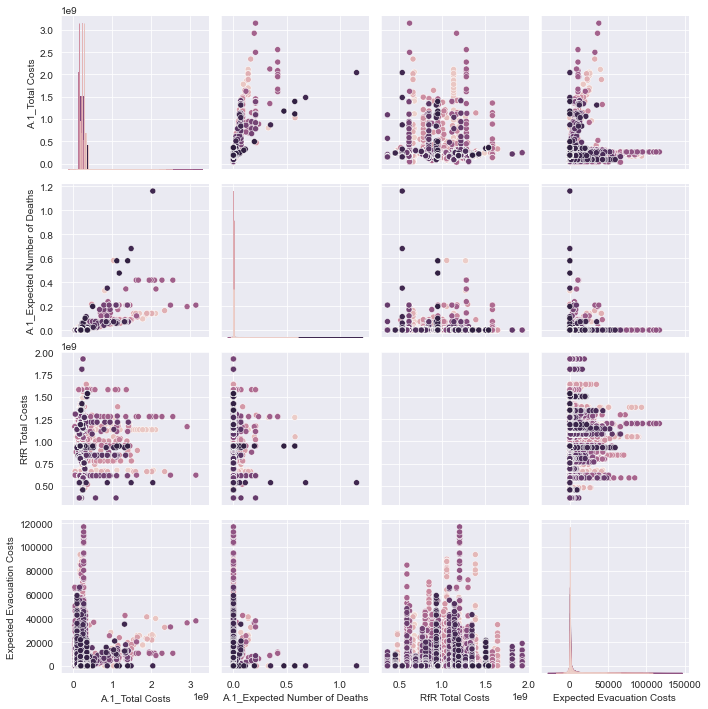

In [13]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A1pairplot=sns.pairplot(A_1data, 
                        hue='policy', 
                        vars=['A.1_Total Costs', 
                              'A.1_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A1pairplot._legend.remove()
A1pairplot.savefig("Figures/A1pairplot.png")

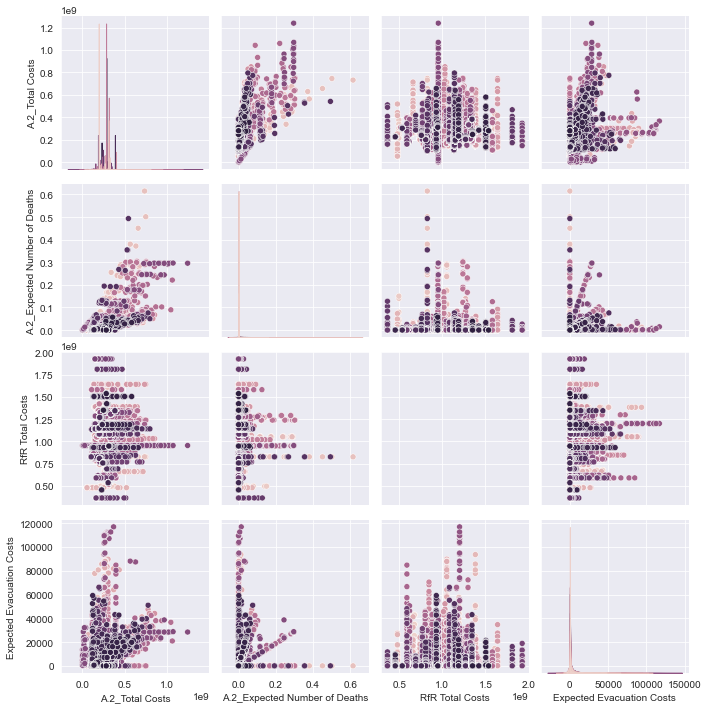

In [14]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A2pairplot=sns.pairplot(A_2data, 
                        hue='policy', 
                        vars=['A.2_Total Costs', 
                              'A.2_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A2pairplot._legend.remove()
A2pairplot.savefig("Figures/A2pairplot.png")

LinAlgError: singular matrix

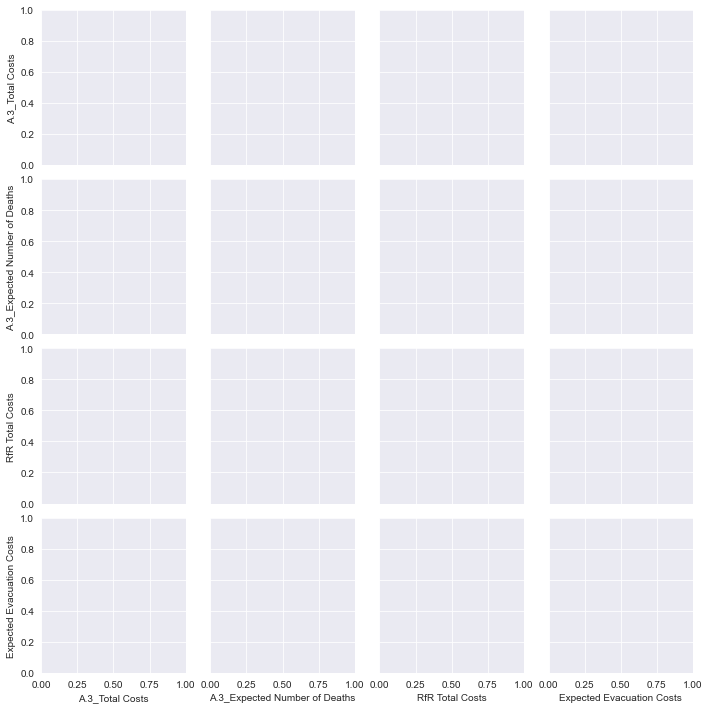

In [15]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A3pairplot=sns.pairplot(A_3data,
                        hue='policy', 
                        vars=['A.3_Total Costs', 
                              'A.3_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A3pairplot._legend.remove()
A3pairplot.savefig("Figures/A3pairplot.png")

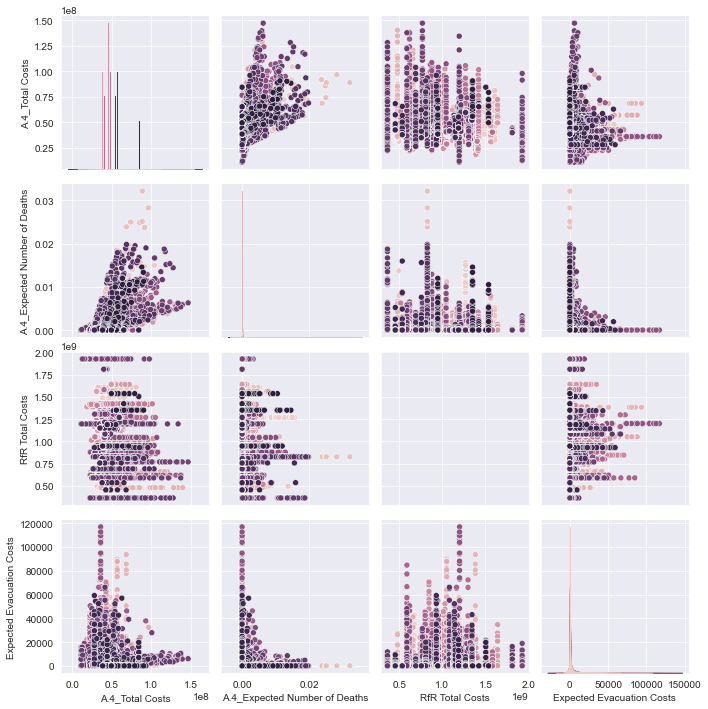

In [16]:
# a pairplot is created to be able to have a first glance at the objectives and possible trade-offs
A4pairplot=sns.pairplot(A_4data, 
                        hue='policy', 
                        vars=['A.4_Total Costs', 
                              'A.4_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A4pairplot._legend.remove()
A4pairplot.savefig("Figures/A4pairplot.png")

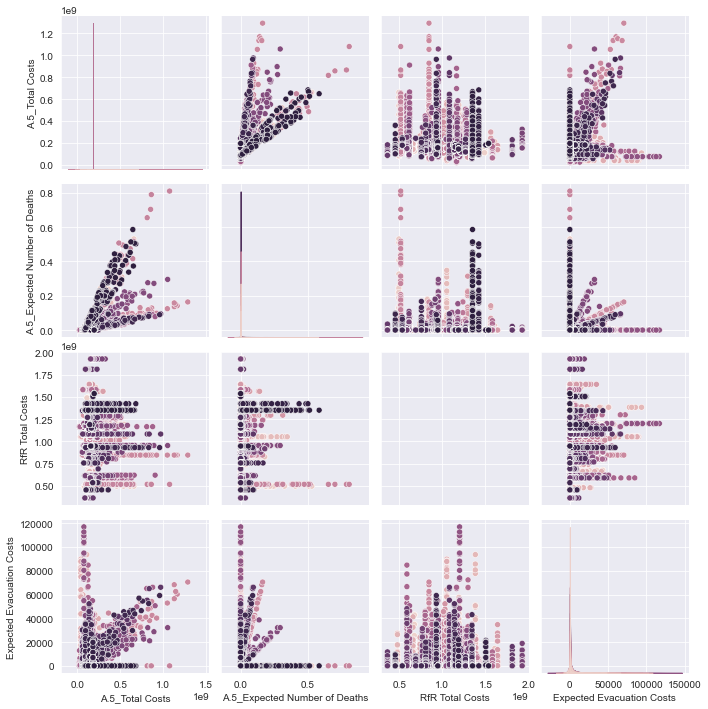

In [17]:
# a pairplot is created to be able to have a first glance at the objectives 
# and possible trade-offs
A5pairplot=sns.pairplot(A_5data, 
                        hue='policy', 
                        vars=['A.5_Total Costs', 
                              'A.5_Expected Number of Deaths', 
                              'RfR Total Costs', 
                              'Expected Evacuation Costs'])

A5pairplot._legend.remove()
A5pairplot.savefig("Figures/A5pairplot.png")

!!! Dit moet aangepast worden!!!!!! 
Various correlations between outcomes are present.



-------------------------------------------------------------------------------------------------------------

* PRIM Scenario Discovery

For the prim analyses boundaries have to be set on the outcomes of interest. To determine which boundary to pick, kde plots are made.

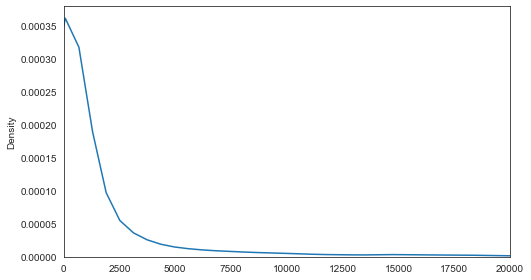

In [42]:
fig, ax = plt.subplots()
sns.kdeplot(outcomes['Expected Evacuation Costs'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 20000])
fig.subplots_adjust(bottom=0.3)
plt.savefig('Figures/Subplot_evac_costs.png')
plt.show()

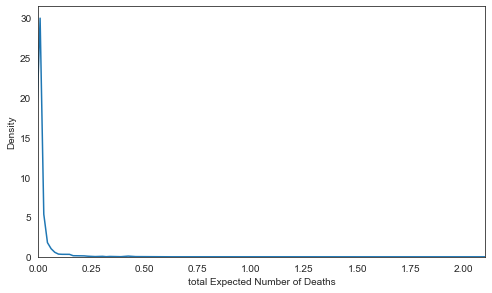

In [46]:
fig, ax = plt.subplots()
sns.kdeplot(data['total Expected Number of Deaths'], ax=ax)
sns.set_style('white')
fig.set_size_inches(8,6)
plt.xlim([0, 2.1])
fig.subplots_adjust(bottom=0.3)
plt.savefig('Figures/total Expected Number of Deaths.png')
plt.show()

boundaries are set on the variables and the fraction of cases which are subsequently evaluated, are determined. All three boundaries contain approximately 75% of the cases.

In [49]:
ydeaths = data['total Expected Number of Deaths'] < 0.01
np.sum(ydeaths)/len(data['total Expected Number of Deaths'])

0.77582

In [24]:
# Verander tot het ongeveer 75% is 
yevac=outcomes['Expected Evacuation Costs'] < 1500
np.sum(yevac)/len(outcomes['Expected Evacuation Costs'])

0.78264

[MainProcess/INFO] model dropped from analysis because only a single category
[MainProcess/INFO] 50000 points remaining, containing 38791 cases of interest
[MainProcess/INFO] mean: 0.9716, mass: 0.05, coverage: 0.06261761748859271, density: 0.9716 restricted_dimensions: 12


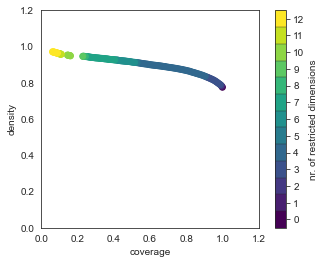

In [50]:
from ema_workbench.analysis import prim
x1 = experiments.drop([o.name for o in dike_model.levers] + ["policy"], axis=1)

prim_alg = prim.Prim(x1, ydeaths, threshold=0.5, peel_alpha=0.01)
boxbestdeaths = prim_alg.find_box()

boxbestdeaths.show_tradeoff()
plt.savefig('Figures/PRIM_fig')
plt.show()

A trade-off has to be made between density and coverage of outcomes in the graph above.

In [51]:
boxbestdeaths.peeling_trajectory[20:40]

,coverage,density,id,mass,mean,res_dim
20,0.873450,0.847050,20,0.800,0.847050,4
21,0.866876,0.849167,21,0.792,0.849167,4
22,0.860045,0.851071,22,0.784,0.851071,4
23,0.853471,0.853273,23,0.776,0.853273,4
24,0.846640,0.855260,24,0.768,0.855260,4
25,0.839860,0.857342,25,0.760,0.857342,4
26,0.832874,0.859255,26,0.752,0.859255,4
27,0.826042,0.861371,27,0.744,0.861371,4
28,0.819468,0.863804,28,0.736,0.863804,4
29,0.812199,0.865549,29,0.728,0.865549,4


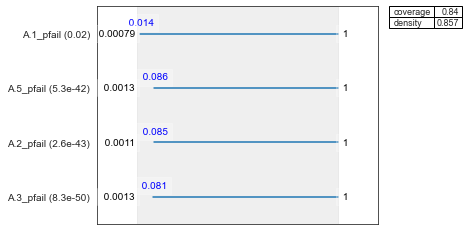

In [52]:
bestdeaths=boxbestdeaths.inspect(25, style='graph')